In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_word_report="/content/drive/MyDrive/Programs/final_project/input/WordReport-v1.04.txt"
path_data="/content/drive/MyDrive/Programs/final_project/input/MindBigData-Imagenet/"
path_output_data="/content/drive/MyDrive/Programs/final_project/output/"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#read word report
df_word_report=pd.read_csv(path_word_report,sep="\t",header=None)
df_word_report.columns=['category','eeg_image_count','synsent ID']
df_word_report

,category,eeg_image_count,synsent ID
0,"domestic cat, house cat, Felis domesticus, Fel...",24,n02121808
1,"rock python, rock snake, Python sebae",29,n01744401
2,Chihuahua,32,n02085620
3,"flute, transverse flute",28,n03372029
4,"grey fox, gray fox, Urocyon cinereoargenteus",25,n02120505
...,...,...,...
564,keeshond,19,n02112350
565,"corkscrew, bottle screw",23,n03109150
566,"Angora, Angora rabbit",21,n02328150
567,coffee maker,28,n03063338


In [ ]:
#sample file
df_data_1=pd.read_csv(path_data+"MindBigData_Imagenet_Insight_n02089078_168_1_2601.csv",header=None)
df_data_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384
0,AF3,4279.487179,4279.487179,4280.512821,4297.435897,4315.384615,4299.487179,4278.974359,4292.307692,4302.051282,4299.487179,4297.948718,4289.230769,4289.230769,4297.948718,4297.435897,4293.846154,4282.051282,4261.025641,4275.897436,4299.487179,4286.666667,4275.384615,4271.282051,4282.051282,4297.435897,4280.512821,4267.692308,4277.948718,4284.102564,4289.230769,4291.794872,4278.974359,4274.358974,4281.025641,4282.564103,4284.102564,4282.564103,4278.461538,4280.512821,...,4317.948718,4294.358974,4291.794872,4299.487179,4295.384615,4290.256410,4292.307692,4307.179487,4317.435897,4314.358974,4315.384615,4307.179487,4292.307692,4298.974359,4298.461538,4286.153846,4295.897436,4292.820513,4271.282051,4272.820513,4284.615385,4279.487179,4281.538462,4300.512821,4299.487179,4288.717949,4302.564103,4311.794872,4295.897436,4292.820513,4297.948718,4291.794872,4298.974359,4307.692308,4298.461538,4296.410256,4300.512821,4281.025641,4273.846154,4294.871795
1,AF4,4258.974359,4278.974359,4263.589744,4233.333333,4228.205128,4262.564103,4279.487179,4238.461538,4218.974359,4250.256410,4270.256410,4268.717949,4250.769231,4231.282051,4233.333333,4266.153846,4266.153846,4224.615385,4231.794872,4260.000000,4244.102564,4228.205128,4239.487179,4248.205128,4248.205128,4244.615385,4236.923077,4248.205128,4250.256410,4244.615385,4272.307692,4258.974359,4215.897436,4226.153846,4251.794872,4254.358974,4240.512821,4234.358974,4252.820513,...,4271.282051,4250.769231,4266.153846,4290.769231,4273.846154,4245.128205,4254.358974,4275.384615,4271.794872,4262.051282,4262.051282,4268.205128,4274.871795,4269.743590,4261.538462,4260.512821,4253.333333,4251.794872,4265.128205,4255.384615,4243.589744,4258.461538,4265.128205,4264.102564,4272.307692,4267.692308,4261.025641,4274.358974,4270.256410,4244.102564,4239.487179,4269.230769,4298.974359,4276.923077,4245.641026,4246.153846,4238.974359,4232.307692,4250.256410,4249.743590
2,T7,4262.564103,4246.153846,4253.846154,4289.743590,4288.717949,4246.153846,4234.871795,4256.410256,4265.641026,4266.153846,4261.025641,4254.358974,4259.487179,4269.743590,4265.641026,4251.794872,4247.692308,4250.769231,4254.871795,4262.564103,4267.179487,4248.717949,4233.846154,4254.871795,4268.205128,4258.974359,4256.923077,4255.897436,4257.948718,4268.717949,4267.692308,4263.076923,4265.128205,4261.538462,4261.538462,4268.717949,4275.897436,4276.923077,4272.307692,...,4237.435897,4242.051282,4241.538462,4227.179487,4228.205128,4243.076923,4250.769231,4247.692308,4241.538462,4248.205128,4252.307692,4246.153846,4255.384615,4262.051282,4251.282051,4254.871795,4261.025641,4248.717949,4240.512821,4243.589744,4252.307692,4263.589744,4265.641026,4257.948718,4253.846154,4256.410256,4260.000000,4265.128205,4273.846154,4273.846154,4265.641026,4264.615385,4266.666667,4266.666667,4265.128205,4256.923077,4245.128205,4246.666667,4260.512821,4266.666667
3,T8,4180.512821,4206.153846,4236.410256,4184.615385,4162.564103,4224.102564,4218.974359,4167.179487,4192.307692,4233.333333,4217.948718,4196.923077,4194.358974,4198.461538,4205.641026,4200.000000,4183.589744,4189.230769,4211.282051,4198.461538,4176.923077,4196.923077,4203.589744,4187.179487,4193.846154,4194.358974,4188.717949,4207.179487,4225.128205,4215.384615,4191.794872,4192.307692,4204.102564,4188.717949,4178.461538,4201.025641,4209.230769,4198.461538,4192.307692,...,4228.717949,4195.384615,4185.128205,4208.205128,4201.538462,4190.256410,4195.897436,4202.564103,4212.307692,4210.769231,4184.102564,4177.435897,4198.974359,4207.179487,4199.487179,4191.282051,4178.461538,4164.615385,4170.769231,4190.256410,4190.256410,4181.025641,4189.743590,4210.256410,4208.717949,4177.435897,4169.743590,4197.435897,4212.820513,4212.820513,4206.666667,418

In [ ]:
#reads filenames from the input folder
import glob
import os

sourcepath=path_data

#get list of all files in given folder
sourcefiles = os.listdir(sourcepath)

len(sourcefiles)

14012

In [ ]:
#reads filenames from the input folder
import glob
import os

sourcepath=path_data

#get list of all files in given folder
sourcefiles = os.listdir(sourcepath)

#print(type(sourcefiles)) #just for info
#print(len(sourcefiles))  #just for info

df_lst_all_files=[]

for i in range(len(sourcefiles)): #len(sourcefiles)
    print(i)
    #read each file in dataframe
    df = pd.read_csv(path_data+sourcefiles[i], header=None)


    #filename : MindBigData_Imagenet_Insight_n02077923_4823_1_2602.csv 
    #split as  => ['MindBigData', 'Imagenet', 'Insight', 'n02077923', '4823', '1', '2602']
    sub_names=sourcefiles[i].split(".")[0].split("_")
    #print(sub_names)

    #insert supplementary session data in new columns
    df.insert(loc=0, column='image_category', value=sub_names[3])
    df.insert(loc=0, column='image_id', value=sub_names[4])
    df.insert(loc=0, column='number_of_sessions', value=sub_names[5])
    df.insert(loc=0, column='global_session_id', value=sub_names[6])
    

    #append single file dataframe to list
    df_lst_all_files.append(df)

df #just for info view last df content

Streaming output truncated to the last 5000 lines.
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099
9100
9101
9102
9103
9104
9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201

,global_session_id,number_of_sessions,image_id,image_category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392
0,4,1,9464,n02095889,AF3,4321.538462,4310.256410,4308.205128,4304.102564,4300.000000,4297.435897,4289.230769,4291.794872,4294.358974,4287.692308,4295.897436,4308.205128,4295.897436,4274.871795,4273.846154,4285.128205,4295.897436,4304.102564,4303.589744,4296.410256,4299.487179,4306.153846,4305.641026,4308.205128,4301.538462,4281.025641,4277.435897,4280.512821,4270.769231,4275.897436,4293.846154,4283.076923,4263.076923,4271.794872,4283.589744,...,4288.717949,4291.282051,4296.923077,4299.487179,4285.128205,4287.179487,4307.179487,4304.615385,4296.410256,4301.538462,4296.923077,4290.256410,4295.897436,4297.435897,4305.128205,4315.384615,4306.666667,4303.589744,4314.358974,4307.692308,4293.333333,4298.974359,4307.179487,4312.307692,4323.589744,4320.512821,4305.641026,4303.589744,4306.666667,4302.051282,4301.025641,4303.589744,4308.205128,4314.871795,4320.512821,4323.076923,4312.307692,4306.666667,4318.974359,4316.410256
1,4,1,9464,n02095889,AF4,4316.410256,4315.897436,4294.358974,4287.692308,4305.641026,4306.153846,4281.538462,4271.282051,4289.230769,4298.974359,4286.666667,4286.153846,4301.025641,4288.717949,4248.205128,4241.025641,4285.641026,4312.820513,4296.410256,4294.358974,4310.769231,4304.615385,4293.333333,4294.871795,4292.820513,4277.435897,4264.102564,4273.846154,4279.487179,4263.076923,4261.025641,4274.871795,4268.205128,4257.435897,4270.769231,...,4251.282051,4263.076923,4264.615385,4261.538462,4262.051282,4256.923077,4263.076923,4281.025641,4278.461538,4270.769231,4273.333333,4255.897436,4247.692308,4260.000000,4254.358974,4256.410256,4285.641026,4294.358974,4279.487179,4275.384615,4276.923077,4275.384615,4283.076923,4286.666667,4290.769231,4287.692308,4264.102564,4266.153846,4294.871795,4289.743590,4267.179487,4277.948718,4284.102564,4270.256410,4281.025641,4294.358974,4280.000000,4271.794872,4283.589744,4281.538462
2,4,1,9464,n02095889,T7,4357.948718,4381.538462,4403.076923,4374.871795,4376.923077,4390.256410,4358.461538,4368.717949,4404.615385,4387.179487,4381.025641,4401.538462,4372.307692,4341.025641,4364.102564,4368.717949,4345.128205,4362.564103,4377.948718,4349.743590,4356.410256,4383.076923,4355.384615,4343.589744,4369.743590,4355.384615,4346.666667,4362.564103,4331.794872,4317.435897,4357.948718,4356.923077,4329.743590,4353.333333,4366.666667,...,4347.692308,4329.743590,4338.461538,4353.333333,4335.897436,4340.000000,4346.666667,4338.974359,4363.589744,4371.282051,4340.000000,4350.769231,4365.641026,4328.717949,4332.307692,4371.282051,4358.974359,4349.230769,4377.948718,4360.000000,4337.435897,4368.717949,4370.256410,4352.820513,4363.589744,4351.794872,4337.435897,4348.717949,4334.358974,4325.128205,4344.102564,4331.794872,4325.128205,4347.179487,4347.692308,4347.179487,4347.692308,4336.923077,4340.000000,4340.000000
3,4,1,9464,n02095889,T8,4261.025641,4268.205128,4257.948718,4267.692308,4269.743590,4234.358974,4217.435897,4254.871795,4278.974359,4251.282051,4225.128205,4233.333333,4243.076923,4237.435897,4232.307692,4229.230769,4230.769231,4250.256410,4261.538462,4244.102564,4239.487179,4249.230769,4235.897436,4230.256410,4251.282051,4244.615385,4218.461538,4227.692308,4250.769231,4235.897436,4212.820513,4224.102564,4243.589744,4252.820513,4251.794872,...,4246.666667,4246.666667,4233.333333,4229.230769,4241.025641,4248.717949,4249.230769,4245.128205,4238.461538,4234.358974,4230.769231,4238.461538,4255.384615,4241.025641,4208.717949,4217.435897,4248.717949,4254.358974,4242.051282,4232.820513,4239.487179,4244.615385,4239.487179,4254.871795,4268.205128,4249.743590,4245.641026,4265.128205,4247.179487,4220.512821,4232.307692,4249.743590,4249.743590,4242.564103,4242.564103,4251.282051,4248.20512

In [ ]:
#concatenate all dataframes in one dataframe
frame = pd.concat(df_lst_all_files, axis=0, ignore_index=True)


,global_session_id,number_of_sessions,image_id,image_category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444
0,2602,1,4823,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2602,1,4823,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2602,1,4823,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2602,1,4823,n02077923,T8,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,4182.051282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2602,1,4823,n02077923,Pz,4145.128205,4138.461538,4145.128205,4142.051282,4132.307692,4134.358974,4137.948718,4146.153846,4155.384615,4149.743590,4147.692308,4152.820513,4145.128205,4138.461538,4146.153846,4144.615385,4140.512821,4152.820513,4168.717949,4175.384615,4167.692308,4150.256410,4147.179487,4157.948718,4148.717949,4130.256410,4138.461538,4154.871795,4136.410256,4113.846154,4135.897436,4161.538462,4154.358974,4146.153846,4150.769231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70055,4,1,9464,n02095889,AF3,4321.538462,4310.256410,4308.205128,4304.102564,4300.000000,4297.435897,4289.230769,4291.794872,4294.358974,4287.692308,4295.897436,4308.205128,4295.897436,4274.871795,4273.846154,4285.128205,4295.897436,4304.102564,4303.589744,4296.410256,4299.487179,4306.15384

In [ ]:
#rename 'channels' column from 0
frame.rename(columns = {0:'channels'}, inplace = True)

#iterate through all column names and change int ones with t_[0-9*] timestamp format
for j in range(len(frame.columns)):

    #old column name
    old = frame.columns[j]
    #print(old) #just for info
    
    #rename column name if its integer
    if isinstance(old, int):
      new = "t_"+str(old)
      #print(old,"=>",new)  #just for info
      frame = frame.rename(columns = {old:new})
      
    

,global_session_id,number_of_sessions,image_id,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,...,t_405,t_406,t_407,t_408,t_409,t_410,t_411,t_412,t_413,t_414,t_415,t_416,t_417,t_418,t_419,t_420,t_421,t_422,t_423,t_424,t_425,t_426,t_427,t_428,t_429,t_430,t_431,t_432,t_433,t_434,t_435,t_436,t_437,t_438,t_439,t_440,t_441,t_442,t_443,t_444
0,2602,1,4823,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2602,1,4823,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2602,1,4823,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2602,1,4823,n02077923,T8,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,4182.051282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2602,1,4823,n02077923,Pz,4145.128205,4138.461538,4145.128205,4142.051282,4132.307692,4134.358974,4137.948718,4146.153846,4155.384615,4149.743590,4147.692308,4152.820513,4145.128205,4138.461538,4146.153846,4144.615385,4140.512821,4152.820513,4168.717949,4175.384615,4167.692308,4150.256410,4147.179487,4157.948718,4148.717949,4130.256410,4138.461538,4154.871795,4136.410256,4113.846154,4135.897436,4161.538462,4154.358974,4146.153846,4150.769231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70055,4,1,9464,n02095889,AF3,4321.538462,4310.256410,4308.205128,4304.102564,4300.000000,4297.435897,4289.230769,4291.794872,4294.3589

In [ ]:
merged=frame.to_csv(path_output_data+"merged.csv")

In [ ]:


frame=pd.read_csv(path_output_data+"merged.csv",index_col=0)
frame.head()

,global_session_id,number_of_sessions,image_id,image_category,channels,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15,t_16,t_17,t_18,t_19,t_20,t_21,t_22,t_23,t_24,t_25,t_26,t_27,t_28,t_29,t_30,t_31,t_32,t_33,t_34,t_35,...,t_405,t_406,t_407,t_408,t_409,t_410,t_411,t_412,t_413,t_414,t_415,t_416,t_417,t_418,t_419,t_420,t_421,t_422,t_423,t_424,t_425,t_426,t_427,t_428,t_429,t_430,t_431,t_432,t_433,t_434,t_435,t_436,t_437,t_438,t_439,t_440,t_441,t_442,t_443,t_444
0,2602,1,4823,n02077923,AF3,4320.000000,4332.307692,4334.871795,4342.564103,4333.333333,4313.333333,4318.974359,4349.743590,4358.974359,4335.384615,4321.025641,4333.333333,4345.641026,4334.358974,4321.025641,4320.000000,4321.538462,4320.000000,4311.794872,4309.230769,4311.282051,4301.025641,4288.205128,4291.794872,4296.923077,4290.769231,4303.076923,4337.435897,4334.358974,4298.974359,4292.307692,4305.128205,4305.641026,4305.641026,4303.589744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2602,1,4823,n02077923,AF4,4294.871795,4305.128205,4298.974359,4307.179487,4312.307692,4284.102564,4274.871795,4314.358974,4330.769231,4324.615385,4311.282051,4275.384615,4284.615385,4322.564103,4318.461538,4285.641026,4272.820513,4307.692308,4353.333333,4341.538462,4307.179487,4307.692308,4307.692308,4304.615385,4321.538462,4312.307692,4292.307692,4298.461538,4285.641026,4278.461538,4311.282051,4318.974359,4297.435897,4301.025641,4321.538462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2602,1,4823,n02077923,T7,4187.692308,4200.000000,4208.717949,4199.487179,4199.487179,4208.205128,4210.769231,4228.205128,4258.974359,4257.948718,4232.820513,4235.384615,4251.282051,4246.666667,4245.128205,4245.641026,4237.948718,4237.948718,4237.435897,4229.743590,4237.435897,4245.641026,4230.769231,4222.051282,4230.256410,4232.307692,4227.179487,4231.282051,4244.102564,4250.769231,4241.538462,4231.794872,4237.435897,4244.615385,4244.615385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2602,1,4823,n02077923,T8,4203.076923,4224.615385,4249.743590,4231.794872,4190.769231,4186.666667,4208.717949,4223.589744,4226.153846,4229.230769,4233.846154,4222.564103,4210.256410,4215.384615,4217.948718,4202.051282,4188.717949,4202.564103,4215.897436,4219.487179,4226.666667,4214.358974,4183.589744,4184.102564,4221.538462,4242.564103,4226.153846,4217.948718,4225.128205,4208.717949,4185.128205,4206.153846,4228.717949,4204.102564,4182.051282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2602,1,4823,n02077923,Pz,4145.128205,4138.461538,4145.128205,4142.051282,4132.307692,4134.358974,4137.948718,4146.153846,4155.384615,4149.743590,4147.692308,4152.820513,4145.128205,4138.461538,4146.153846,4144.615385,4140.512821,4152.820513,4168.717949,4175.384615,4167.692308,4150.256410,4147.179487,4157.948718,4148.717949,4130.256410,4138.461538,4154.871795,4136.410256,4113.846154,4135.897436,4161.538462,4154.358974,4146.153846,4150.769231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### view sample signals

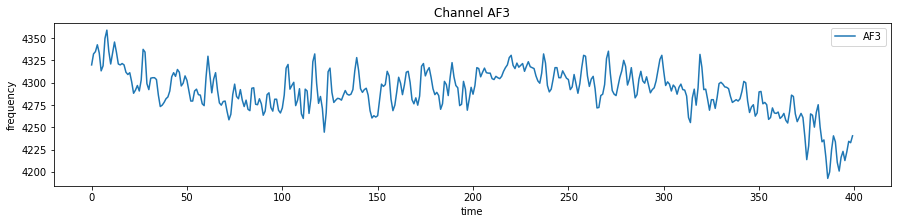

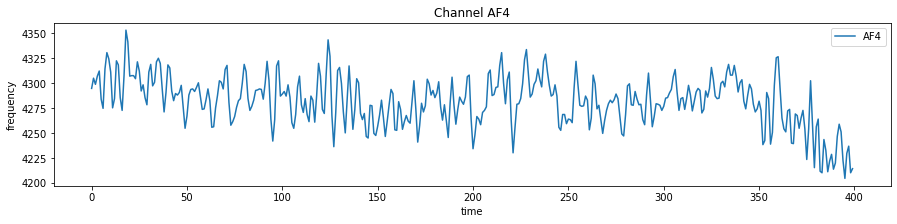

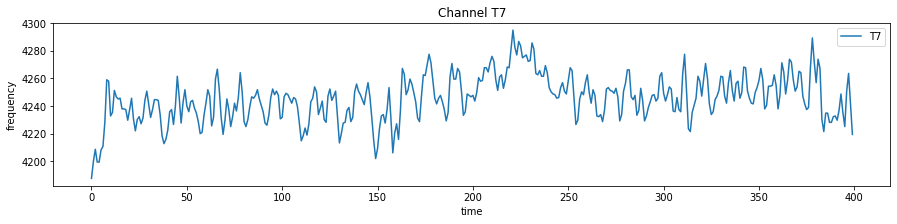

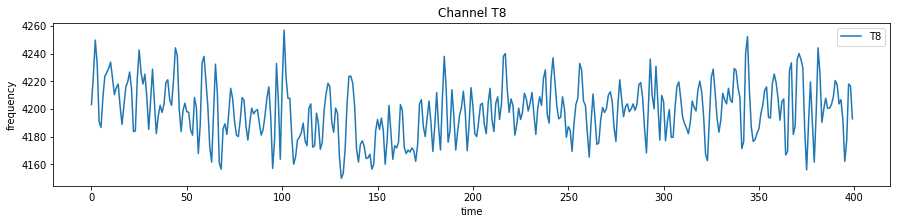

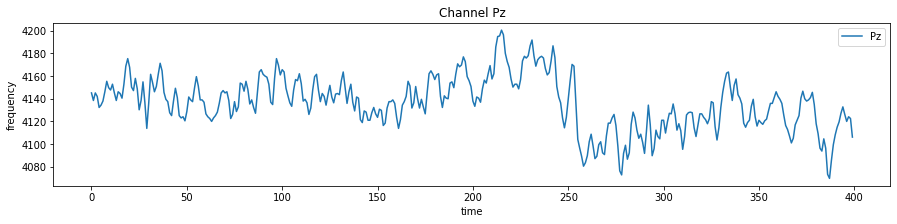

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#plot frequencies for all channels for first category (i.e first 5 rows)
for i in range(5):
  sample = frame.loc[i, 't_1':]
  channel=frame.loc[i, 'channels']

  plt.figure(figsize=(15, 3))
  plt.plot(range(len(sample)), sample, label=channel)
  
  plt.title("Channel "+channel)
  plt.ylabel('frequency')
  plt.xlabel('time')
  plt.legend()
  plt.show()
  print("\n")

In [ ]:
frame.shape

In [ ]:
frame.isnull().sum()